In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Background

In [2]:
#My incredible wife runs a family Walk Inn Clinic in the loca town we live in. 
#She plans her day every morning before going to work and consistantly 
#checks her schedual to determine when her next patient will is planned to come.
#Recently she has been complaining much more of patients not coming into their scheduled times, or 
#just not showing up. 

#The data that I used is data representing patients who were schedualed to show up at a preplanned time. 
#NNext, the data shows if the patient actually showed up. 

#Examining this data is important because it will help me better understand which patients 
#may not show up to the planned appointment and which patients will show up. 
#I plan on using this data to better help my wifes company structure staff to decreaase downtime. 

# Questions

In [3]:
#Question 1: Is there any difference between which sex scheduals appointmnt? And which sex shows up less than another?
#Question 2: Is wait time affecting if a patients shows up? Which sex is more affected?
#Question 3: Does age play any factor in a patient shwoing up to an appointment? 

# Predictions

In [4]:
#Prediction for question 1: If I was to place a bet I would say woman will go to
#to the doctors office much more than men. But I believe men are more likely to not show up than compared to woman. 


In [5]:
#Prediction for question 2: From a patient perspective, if the wait time is more than 20 min, I will be leaving. 
# So I bet the data shows the longer the wait, the higher odds the patient left

In [6]:
#Prediction for question 3: I bet the older the patient, the more likely they are to show up and stay until they see a doctor

In [8]:
df = pd.read_csv('C:/Users/victo/Documents/550 Part 2/Week2/Walkindata.csv')
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
show               object
dtype: object

In [9]:
#Knowing that we will be needing to work with specific data types, 
#it is important to identify if any data may need need to be chaanged to
# a different type. When looking at the types, I see "No-show" will
#need to be changed. The "no-show" needs to be changed to 
# a Boolean. 

In [10]:
#Since the patient id variable may be used,
#it will be best to change it into a string. 
df['PatientId'] = df['PatientId'].astype('int64')
df['PatientId'] = df['PatientId'].astype('str')

In [11]:
#Because we will be using multiple key features
# I want to go ahead and change some to additional
#Types of data. 
df['Gender'] = df['Gender'].astype('category')


In [12]:
#As someone who likes to use visuals to show what is happening, I decided 
#to create a function which will quickly allow for the data to be 
# placed into a visual aid. 

In [13]:
def feature_rel_plot(data, kind, var1=None, var2=None, var3=None, var4=None, var5=None, col=0):
    '''
    Creates a plot that shows relationship between features in a dataframe

    Inputs:

    data:-          dataframe
    kind:-          str; the kind of plot being made ("count",“point”, “bar”, “strip”, “swarm”,
                    “box”, “violin”, or “boxen”, etc)
    var1,var2,...   :-  the columns/variables to be plotted

    '''
    f = plt.figure(figsize=(15,15));
    sns.set_style("darkgrid");

    if kind == 'count':
        [x,hue,col,row] = [var1,var2,var3,var4]
        ax = sns.catplot(data=data, kind=kind, x=x, y=None, hue=hue, col=col, row=row, height=6, aspect=1.3);
        ax.set(ylabel='Number of appointments');

    else:
        [x,y,hue,col,row] = [var1,var2,var3,var4,var5]
        ax = sns.catplot(data=data, kind=kind, x=x, y=y, hue=hue, col=col, row=row, height=6, aspect=1.3);

    features = list(filter(lambda x: x is not None, [var1,var2,var3,var4,var5]))
    ax.fig.subplots_adjust(top=0.9);
    ax.fig.suptitle((f"Relationship Between Number of Appointments and ({', '.join(features)})").upper(), fontsize=16);

    return

# Question 1

In [14]:
df.groupby('Gender').Gender.count()

Gender
F    71840
M    38687
Name: Gender, dtype: int64

<Figure size 1080x1080 with 0 Axes>

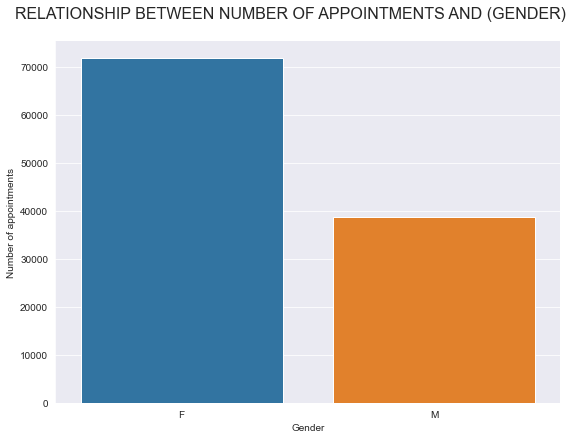

In [15]:
#Lets see the numbers above using a bar graph. 
feature_rel_plot(df, 'count', 'Gender')


In [16]:
#When examining this graph, it is easy to determine that the amount of women
#making appointments is greater than the amount of men. This is what I was 
#thinking that this portion of data would show, since Men are far less
#likely to beieve that they need to see a doctor. The amnount of woman believing
#wanting to see the doctos is close to two times greater than the amount of
#men wanting to see the doctor. 

In [17]:
Gender_percent = df.groupby('Gender').Gender.count()*100/df.Gender.count()
print(f'The % of Woman making appointments is {Gender_percent.F:.0f}%. Men make up {Gender_percent.M:.0f}% appointments')

The % of Woman making appointments is 65%. Men make up 35% appointments


In [18]:
gs_counts = df.groupby(['show', 'Gender']).show.count()
gs_counts

show  Gender
No    F         57246
      M         30962
Yes   F         14594
      M          7725
Name: show, dtype: int64

<Figure size 1080x1080 with 0 Axes>

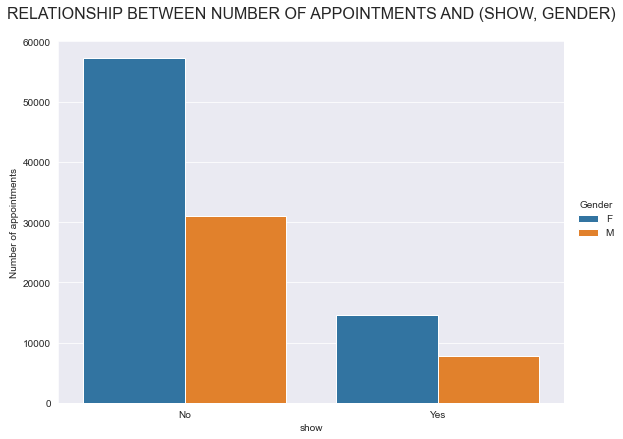

In [19]:
feature_rel_plot(df, 'count', 'show', 'Gender')

In [20]:
#The above graph starts to show the importance of breaking down the data
#a bit more. In this graph you can start to see how many more woman 
#are also not showing up to an appointment. This result is a result that
#I expected, since more woman make appointmnets, it would make sense that more woman
#do not show up to appointments. 

# Question 2

In [21]:
#To determine if the amount of waiting time has an impact 
#on if a patint showes up, I first have to change the datatype
# of the ScheduledDay and AppointmentDay columns.
# The reason for this is so I can perform operations on the data
# which will allow additional data extractions. 

In [22]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [23]:
df['waiting'] = (df.AppointmentDay - df.ScheduledDay).abs().dt.days
df.waiting.head(3)

0    0
1    0
2    0
Name: waiting, dtype: int64

In [24]:
df.waiting.describe()

count    110527.000000
mean          9.532829
std          15.027683
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting, dtype: float64

In [25]:
#The the data above shows us some interesting characteristics.
#The average wait time is 9.5 days. Now I believs is a really long time to
#wait for a vist. Additioanlly, atleast 25% of patients had no waiting time
#at all. What is strainge is that the maximum amount of time a patient waited
# was 178 days. Which is an outlire. 

In [26]:
#To help organize the data, we need to be able to break down as much of
#the data as possible. To do this, we need to catigorize the age groups
#into different groups to get a better understanding of what is happening
#insude the data.

In [27]:
df['age_range'] = pd.cut(df.Age, labels = ['0 - 4','5 - 14','15 - 24', '25 - 44',
                            '45 - 64', '65 - 115'], bins = [-1,5,15,25,45,65,116])

df['waiting'] = pd.cut(df.waiting, bins=[-1,0,7,30,90,180], include_lowest=True,
                         labels=['no_wait','1_week','1_month','3_months','6_months'])

In [28]:
df.groupby('waiting').count().iloc[:,0]

waiting
no_wait     43776
1_week      29309
1_month     27736
3_months     9545
6_months      161
Name: PatientId, dtype: int64

In [29]:
#Once we group the data into differnt wait time groups, the 
#understanding of the data can increase. Above we see that a very
#large majority of patients have no wait time. Followed by patients that only 
#have to wait a week. 

<Figure size 1080x1080 with 0 Axes>

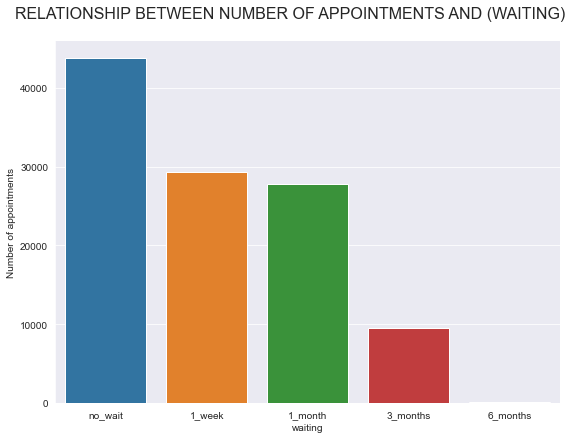

In [30]:
feature_rel_plot(df, 'count', 'waiting')

In [31]:
#The above graph represents the amount of people who showed up to their appointment
#after a particular time of waiting. Thankfully, it is easy see that the less
#amount of time a patient waits to be seen, the more likely the patient is
#to show up to a planned appointment. An interesting fact is that if a planned
#appointme is after 1 month, the odds of a ptient showing drop by over 50%.

#Appointments made 6 months after, have just about zero chance of the patient
#showing up. 

<Figure size 1080x1080 with 0 Axes>

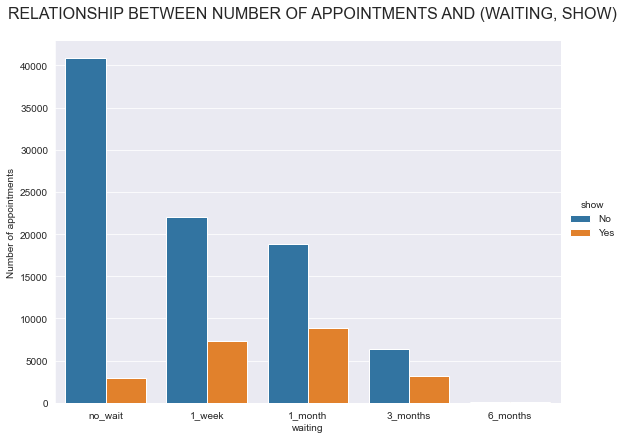

In [32]:
feature_rel_plot(df, 'count', 'waiting', 'show')

In [33]:
#Now in this graph we can clearly see the dramatic drop off 
#of patients showing up based off of time from the original appointment date. 
#One of the shocking values, is that just because there is not a lot of 
#wait time, there is still a large chance of patients not showing up. 

#From this graph we can clearly see that patients wish to make their 
#appointment times as close to the current date as possible and that the 
#amount of patients making appointments decrease if the patients has to wait 
#a week. 

# Question 3

<Figure size 1080x1080 with 0 Axes>

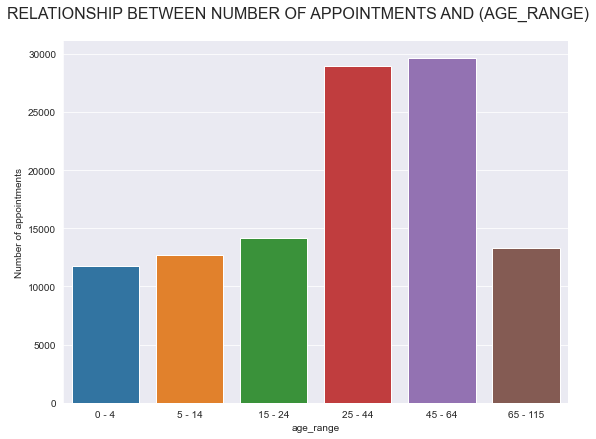

In [34]:
feature_rel_plot(df, 'count', 'age_range')

In [35]:
#In the above chart we can clearly start to see some interesting valus
#being represented. In this graph, we see that there are a large amount of 
#22 - 54 year olds making appointments. This information is makes sense
#Since, that age group is also the highest working class population as well. 

#we would start to think that the highest age group of people not showing up to 
# to appointments would be in the same class. Lets find out. 

<Figure size 1080x1080 with 0 Axes>

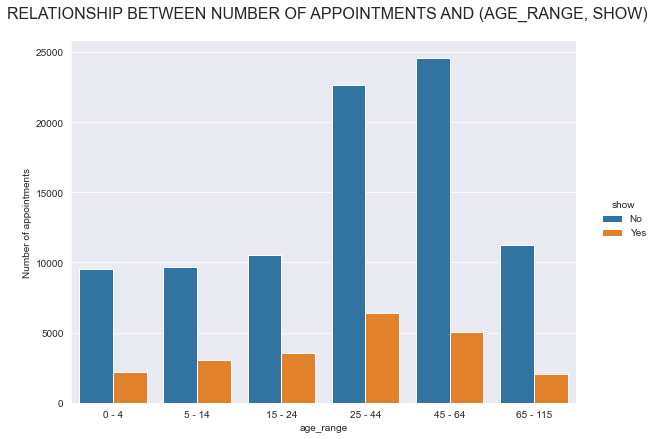

In [36]:
feature_rel_plot(df, 'count', 'age_range', 'show')

In [37]:
#When examining the chart you can see the amount of people who missed broken down by ahe group. 
#The age rage with the most amount of people who did not miss are in the
#catigory age range of 45-64. This makes sense since that age catigory has
#has the most amount of people making appointments. 

#The age group with the most amount of people not showing up is in the
#age group of 25-44. What this piece of data shows isthat the main
#group of working class age range is most likely making different appointments. 